In [5]:
import pandas as pd 
import re 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

In [5]:
df = pd.read_csv('AI_Human.csv')
df.head(10)

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0
5,The electrol college system is an unfair syste...,0.0
6,"Dear state senator, It is the utmost respect t...",0.0
7,"Fellow citizens, cars have become a major role...",0.0
8,"""It's official: The electoral college is unfai...",0.0
9,The Electoral College has been kept for centur...,0.0


In [6]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bedob\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bedob\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
# Check for missing values
print(df.isnull().sum())


text         0
generated    0
dtype: int64


In [8]:
# Get dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB
None


In [9]:
print(df.describe())

           generated
count  487235.000000
mean        0.372383
std         0.483440
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000


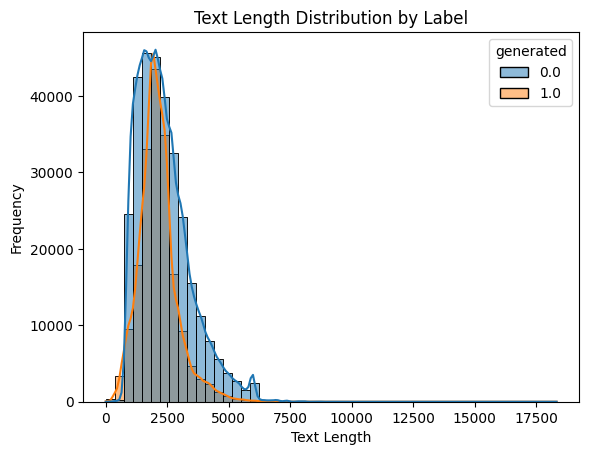

In [10]:
# Add a column for text length
df['text_length'] = df['text'].apply(len)

# Plot text length distribution
sns.histplot(data=df, x='text_length', hue='generated', bins=50, kde=True)
plt.title('Text Length Distribution by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

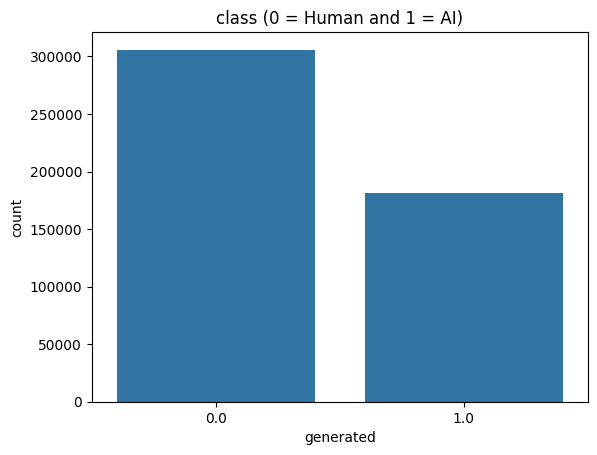

<Figure size 600x400 with 0 Axes>

In [12]:
# some visualiztion 
sns.countplot(x="generated",data=df)
plt.title("class (0 = Human and 1 = AI)")
plt.figure(figsize=(6,4))
plt.show()


In [13]:
print(df["generated"].value_counts())


generated
0.0    305797
1.0    181438
Name: count, dtype: int64


In [7]:
custom_stop_words ={
    'the', 'a', 'an', 'in', 'on', 'at', 'is', 'it', 'of', 'for', 'to', 'and', 'or', 'as', 'with', 'this', 'that'
}
lemmatizer = WordNetLemmatizer() 

In [3]:
# text cleaning 

def clean_text(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = text.lower()
    # tokenization 
    tokens = text.split()
    tokens = [ lemmatizer.lemmatize(word) for word in tokens if word not in custom_stop_words]
    return " ".join(tokens)
    

In [16]:
df["cleaned"] = df["text"].apply(clean_text)



In [28]:
df.head()

,text,generated,text_length,cleaned
0,Cars. Cars have been around since they became ...,0.0,3289,car car have been around since they became fam...
1,Transportation is a large necessity in most co...,0.0,2738,transportation large necessity most country wo...
2,"""America's love affair with it's vehicles seem...",0.0,4428,america s love affair s vehicle seems be cooli...
3,How often do you ride in a car? Do you drive a...,0.0,4013,how often do you ride car do you drive one any...
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698,car are wonderful thing they are perhaps one w...


In [18]:
df.iloc[1][2]

C:\Users\bedob\AppData\Local\Temp\ipykernel_7788\65333983.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[1][2]


2738

In [19]:
X=df['cleaned']
y=df['generated']
print(X)
print(y)

0         car car have been around since they became fam...
1         transportation large necessity most country wo...
2         america s love affair s vehicle seems be cooli...
3         how often do you ride car do you drive one any...
4         car are wonderful thing they are perhaps one w...
                                ...                        
487230    tie face mar really just big misunderstanding ...
487231    whole purpose democracy create government refl...
487232    i firmly believe government worldwide should t...
487233    i dfn t agree decision because lft ff kid may ...
487234    richard non jimmy carter bob dole other compan...
Name: cleaned, Length: 487235, dtype: object
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
487230    0.0
487231    0.0
487232    1.0
487233    0.0
487234    0.0
Name: generated, Length: 487235, dtype: float64


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print((X_train.shape))
print((X_test.shape))
print((y_train.shape))
print((y_test.shape))

(341064,)
(146171,)
(341064,)
(146171,)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidfvectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=3)

pipeline = Pipeline([  
    ('tfidf_transformer', tfidfvectorizer),  
    ('random_forest', RandomForestClassifier())])


In [22]:
# Training the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf_transformer',
                 TfidfVectorizer(max_features=5000, min_df=3,
                                 ngram_range=(1, 2))),
                ('random_forest', RandomForestClassifier())])

In [23]:
import joblib

# Save the pipeline to a file
joblib.dump(pipeline, 'text_classification_pipeline.pkl')


['text_classification_pipeline.pkl']

In [1]:
import joblib

# Load the pipeline
pipeline = joblib.load('text_classification_pipeline.pkl')


In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# predictions (Calculate Accuarcy)
y_pred = pipeline.predict(X_test)
print("Accuracy: ", 
       accuracy_score(y_test,y_pred))

Accuracy:  0.9985633265148354


In [14]:
text = "my name is abdallah iam 22 years old iam writing as a machine learning engineer i wanty to apply to this job so i think ic an afford it my technical skills are java , pyhton and machine larning i took many courses in this field i also have many soft skills like leadership , presentaton and communication and i have excellent english and good german languages so if you see that i cdould help you in this position send to me"

def predict_text(text):
    cleaned_text = clean_text(text)  # apply same cleaning function before training 
    prob = pipeline.predict_proba([cleaned_text])[0]
    return {
        "human": round(prob[0]*100, 1),
        "AI": round(prob[1]*100, 1),
    }

# Example usage:
pred = predict_text(text)
print(pred)

[0.36 0.64]
{'human': 36.0, 'AI': 64.0}
